# Convex Hull

Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 random points in 2-D
hull = ConvexHull(points)

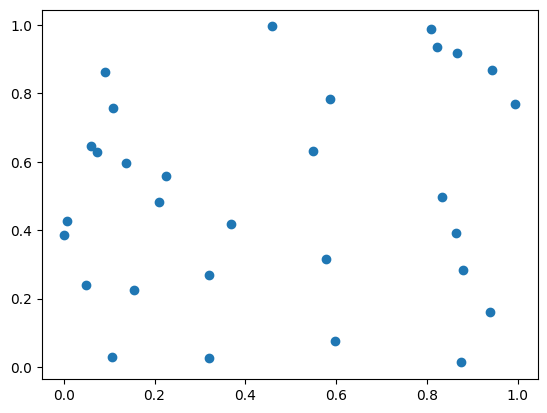

In [ ]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')

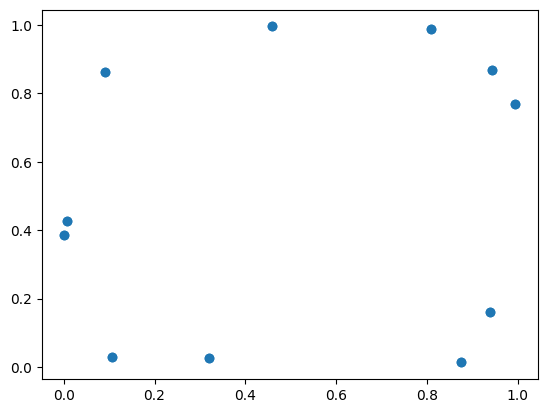

In [ ]:
plt.scatter(points[hull.simplices, 0], points[hull.simplices, 1])

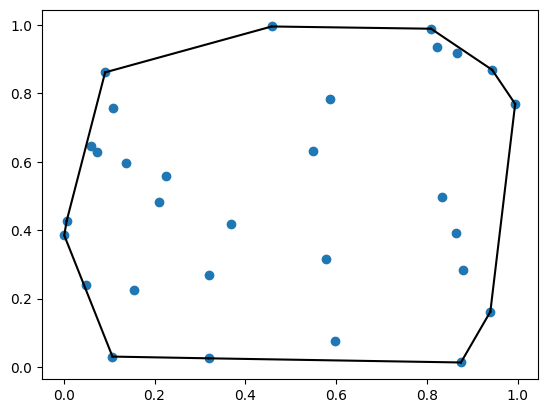

In [ ]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

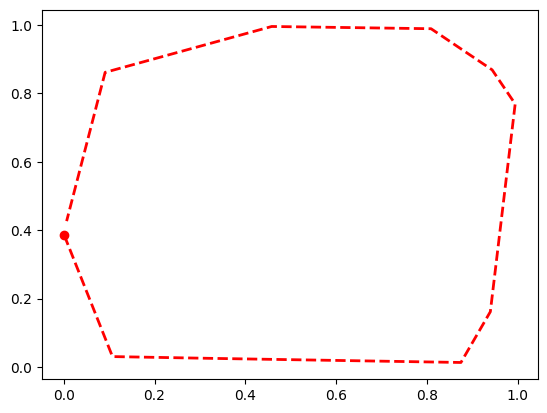

In [ ]:
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

Basic: https://www.geeksforgeeks.org/convex-hull-using-divide-and-conquer-algorithm/

# Phase Diagram

In [ ]:
# Installing all the package
!pip install pymatgen
!pip install matminer
!pip install figrecipes

# Additional dependency
!pip install pydantic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.0/175.0 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

%matplotlib inline

# Get unprocessed_entries using pymatgen.borg or other means.

# Create some example entries
entries = [
    PDEntry(Composition("Li"), -2.9588, name="Li"),
    PDEntry(Composition("Li2O"), -4.9176, name="Li2O"),
    PDEntry(Composition("Li2O2"), -5.8764, name="Li2O2"),
    PDEntry(Composition("Li2O3"), -6.8352, name="Li2O3"),
    PDEntry(Composition("LiO"), -3.9176, name="LiO"),
    PDEntry(Composition("LiO2"), -4.8764, name="LiO2"),
    PDEntry(Composition("Li2O3"), -5.8352, name="Li2O3"),
    # Add an entry for pure O
    PDEntry(Composition("O"), 0.0, name="O"),
]

# Create a phase diagram
pd = PhaseDiagram(entries)

pd.get_plot()

<Axes: >

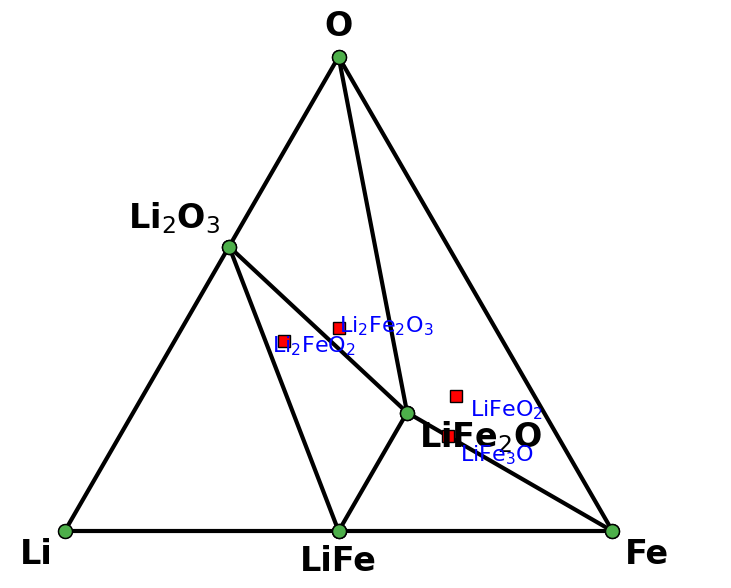

In [ ]:
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter, PDEntry
from pymatgen.core import Composition, Element

# Get unprocessed_entries using pymatgen.borg or other means.

# Create some example entries
entries = [
    PDEntry(Composition("LiFe"), -2.9588, name="LiFe"),
    PDEntry(Composition("LiFe2O"), -4.9176, name="LiFe2O"),
    PDEntry(Composition("Li2FeO2"), -5.8764, name="Li2FeO2"),
    PDEntry(Composition("Li2Fe2O3"), -6.8352, name="Li2Fe2O3"),
    PDEntry(Composition("LiFe3O"), -3.9176, name="LiFe3O"),
    PDEntry(Composition("LiFe4O2"), -4.8764, name="LiFeO2"),
    PDEntry(Composition("Li2O3"), -5.8352, name="Li2O3"),
    # Add an entry for pure O
    PDEntry(Composition("O"), 0.0, name="O"),
    PDEntry(Composition("Fe"), 0.0, name="Fe"),
    PDEntry(Composition("Li"), 0.0, name="Li"),

]

# Create a phase diagram
pd = PhaseDiagram(entries)

# These few lines generates the phase diagram using the ComputedEntries.
pd.get_plot(backend = "matplotlib", ternary_style="3D")

In [ ]:
for e in entries:
    decomp, ehull = pd.get_decomp_and_e_above_hull(e)
    print(decomp)

{PDEntry : Li1 with energy = -2.9588: 1.0}
{PDEntry : Li1 O2 with energy = -4.8764: 0.5, PDEntry : Li1 with energy = -2.9588: 0.5}
{PDEntry : Li1 O2 with energy = -4.8764: 0.75, PDEntry : Li1 with energy = -2.9588: 0.25}
{PDEntry : Li1 O2 with energy = -4.8764: 0.8999999999999999, PDEntry : Li1 with energy = -2.9588: 0.10000000000000009}
{PDEntry : Li1 O2 with energy = -4.8764: 0.75, PDEntry : Li1 with energy = -2.9588: 0.25}
{PDEntry : Li1 O2 with energy = -4.8764: 1.0}
{PDEntry : Li1 O2 with energy = -4.8764: 0.8999999999999999, PDEntry : Li1 with energy = -2.9588: 0.10000000000000009}
{PDEntry : O1 (O) with energy = 0.0000: 1.0}


In [ ]:
for e in entries:
    decomp, phase_sep = pd.get_decomp_and_phase_separation_energy(e)
    print(decomp)

{PDEntry : Li1 with energy = -2.9588: 1.0}
{PDEntry : Li1 O2 with energy = -4.8764: 0.5, PDEntry : Li1 with energy = -2.9588: 0.5}
{PDEntry : Li1 O2 with energy = -4.8764: 0.75, PDEntry : Li1 with energy = -2.9588: 0.25}
{PDEntry : Li1 O2 with energy = -4.8764: 0.8999999999999999, PDEntry : Li1 with energy = -2.9588: 0.10000000000000009}
{PDEntry : Li1 O2 with energy = -4.8764: 0.75, PDEntry : Li1 with energy = -2.9588: 0.25}
{PDEntry : Li1 O1 (LiO) with energy = -3.9176: 0.6666666666666665, PDEntry : O1 (O) with energy = 0.0000: 0.3333333333333334}
{PDEntry : Li1 O2 with energy = -4.8764: 0.8999999999999999, PDEntry : Li1 with energy = -2.9588: 0.10000000000000009}
{PDEntry : O1 (O) with energy = 0.0000: 1.0}
